####  Data Set Link: https://www.kaggle.com/unsdsn/world-happiness
#### 1. BarPlot
#### 2. PointPlot
#### 3. JointPlot
#### 4. ViolinPlot
#### 5. PairPlot
#### 6. CountPlot

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
d_2015=pd.read_csv("2015.csv")
d_2016=pd.read_csv("2016.csv")
d_2017=pd.read_csv("2017.csv")

d_2015.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in d_2015.columns]
d_2016.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in d_2016.columns]
d_2017.columns=[each.replace("."," ") for each in d_2017.columns]
d_2017.columns=[each.split()[0] if(len(each.split())>2) else each.replace(" ","_") for each in d_2017.columns]

In [3]:
d_2015

Country                           Region  Happiness_Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness_Score  Standard_Error  Economy   Family   Health  Freedom  \
0              7.587         0.03411  1.39651  1.34951  0.94143  0.66557   
1              7.561         0.04884  1.30232  1.40223  0.94784  0.62877   
2              7.527         0.03328  1.32548  1.36058  0.87464  0.64938   
3              7.522         0.03880  1.45900  1.33095  0.88521  0.66973   
4              7.427         0.03553  1.32629  1.32261  0.90563  0.63297   
..               ...             ...      ...      ...      ...      ...   
153            3.465         0.03464  0.22208  0.77370  0.42864  0.59201   
154            3.340         0.03656  0.28665  0.35386  0.31910  0.48450   
155            3.006         0.05015  0.66320  0.47489  0.72193  0.15684   
156            2.905         0.08658  0.01530  0.41587  0.22396  0.11850   
157            2.839         0.06727  0.20868  0.13995  0.28443  0.36453   

       Trust  Generosity  Dystopia_Residual  
0    0.41978     0.29678            2.51738  
1    0.14145     0.43630            2.70201  
2    0.48357     0.34139            2.49204  
3    0.36503     0.34699            2.46531  
4    0.32957     0.45811            2.45176  
..       ...         ...                ...  
153  0.55191     0.22628            0.67042  
154  0.08010     0.18260            1.63328  
155  0.18906     0.47179            0.32858  
156  0.10062     0.19727            1.83302  
157  0.10731     0.16681            1.56726  

[158 rows x 12 columns]

In [4]:
d_2015.head()

Country          Region  Happiness_Rank  Happiness_Score  \
0  Switzerland  Western Europe               1            7.587   
1      Iceland  Western Europe               2            7.561   
2      Denmark  Western Europe               3            7.527   
3       Norway  Western Europe               4            7.522   
4       Canada   North America               5            7.427   

   Standard_Error  Economy   Family   Health  Freedom    Trust  Generosity  \
0         0.03411  1.39651  1.34951  0.94143  0.66557  0.41978     0.29678   
1         0.04884  1.30232  1.40223  0.94784  0.62877  0.14145     0.43630   
2         0.03328  1.32548  1.36058  0.87464  0.64938  0.48357     0.34139   
3         0.03880  1.45900  1.33095  0.88521  0.66973  0.36503     0.34699   
4         0.03553  1.32629  1.32261  0.90563  0.63297  0.32957     0.45811   

   Dystopia_Residual  
0            2.51738  
1            2.70201  
2            2.49204  
3            2.46531  
4            2.45176

In [5]:
d_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [6]:
print("Is there any missing data in 2015 dataset:",d_2015.isnull().any().any())
print(d_2015.isnull().sum())

Is there any missing data in 2015 dataset: False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


In [7]:
region_lists=list(d_2015['Region'].unique())
region_happiness_ratio=[]
for each in region_lists:
    region=d_2015[d_2015['Region']==each]
    region_happiness_rate=sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)

data = pd.DataFrame({'region':region_lists,'region_happiness_ratio':region_happiness_ratio})
new_index=(data['region_happiness_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)
sorted_data

region  region_happiness_ratio
2        Australia and New Zealand                7.285000
1                    North America                7.273000
0                   Western Europe                6.689619
4      Latin America and Caribbean                6.144682
7                     Eastern Asia                5.626167
3  Middle East and Northern Africa                5.406900
6       Central and Eastern Europe                5.332931
5                Southeastern Asia                5.317444
9                    Southern Asia                4.580857
8               Sub-Saharan Africa                4.202800

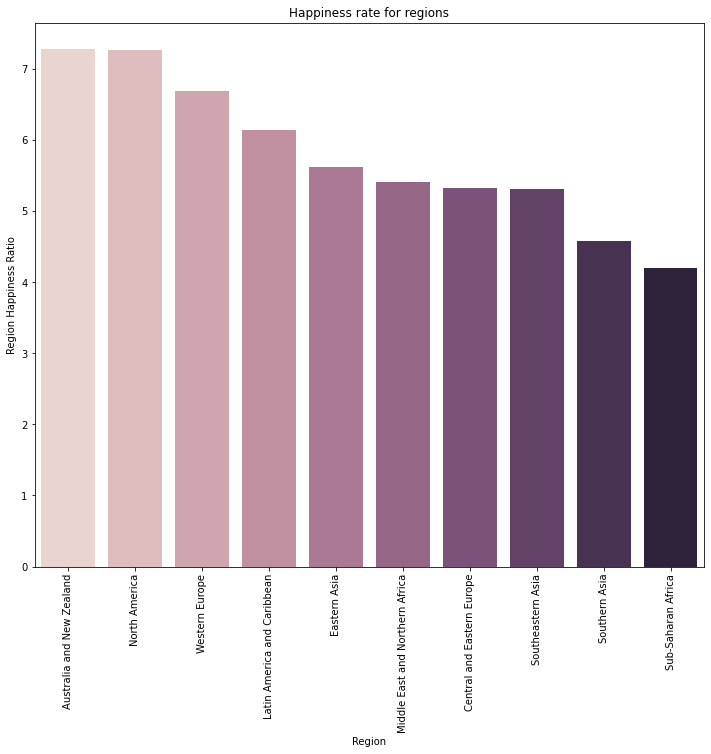

In [8]:
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data['region'], y=sorted_data['region_happiness_ratio'],palette=sns.cubehelix_palette(len(sorted_data['region'])))

plt.xticks(rotation= 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title("Happiness rate for regions")
plt.show()

In [9]:
region_lists=list(d_2015['Region'].unique())
region_economy_ratio=[]
for each in region_lists:
    region=d_2015[d_2015['Region']==each]
    region_economy_rate=sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)

data1 = pd.DataFrame({'region':region_lists,'region_economy_ratio':region_economy_ratio})
new_index_2=(data1['region_economy_ratio'].sort_values(ascending=False)).index.values
sorted_data_economy = data1.reindex(new_index_2)
sorted_data_economy

region  region_economy_ratio
1                    North America              1.360400
0                   Western Europe              1.298596
2        Australia and New Zealand              1.291880
7                     Eastern Asia              1.151780
3  Middle East and Northern Africa              1.066973
6       Central and Eastern Europe              0.942438
4      Latin America and Caribbean              0.876815
5                Southeastern Asia              0.789054
9                    Southern Asia              0.560486
8               Sub-Saharan Africa              0.380473

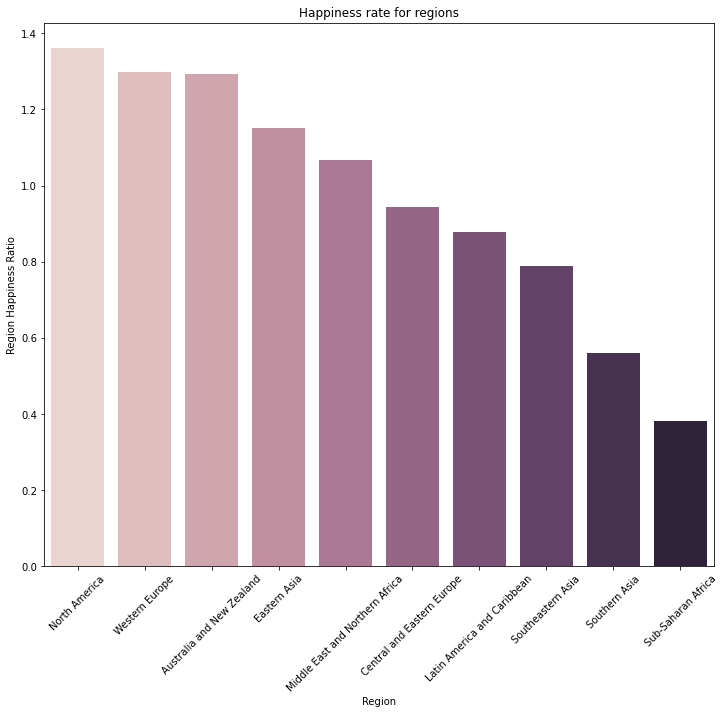

In [10]:
plt.figure(figsize=(12,10))
sns.barplot(x=sorted_data_economy['region'], y=sorted_data_economy['region_economy_ratio'],palette=sns.cubehelix_palette(len(sorted_data_economy['region'])))

plt.xticks(rotation= 45)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title("Happiness rate for regions")
plt.show()

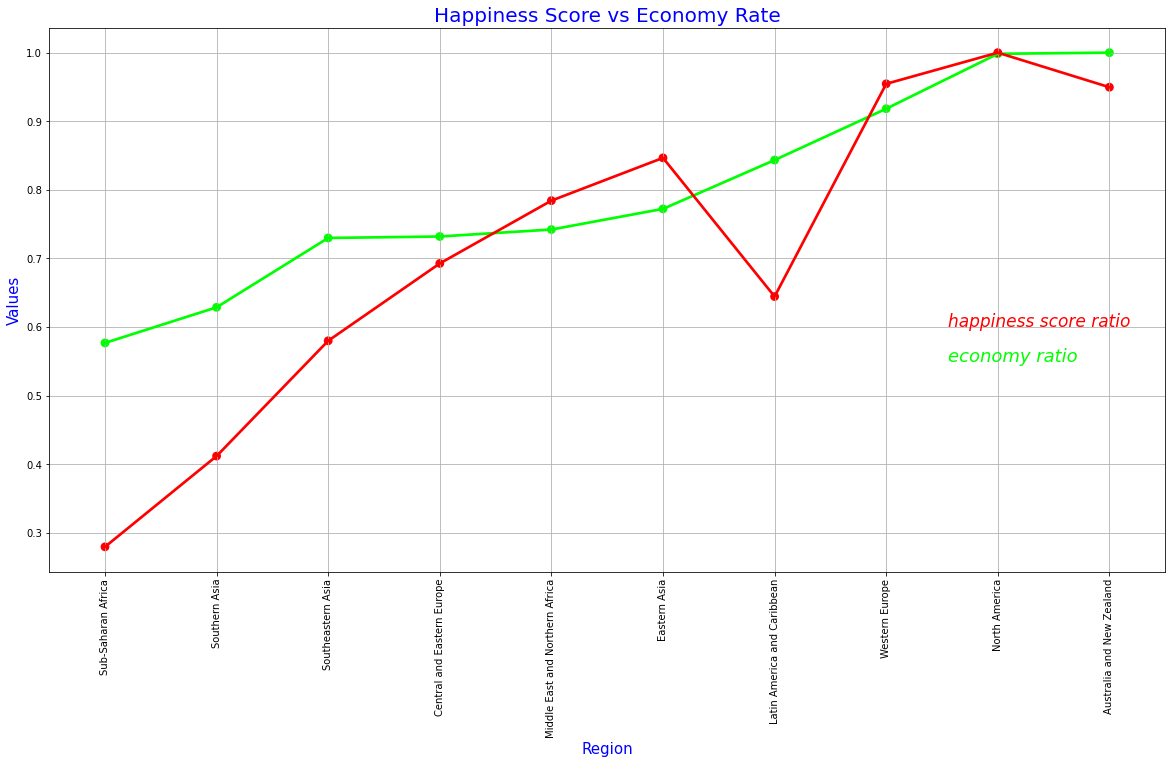

In [11]:
sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])

data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x="region",y="region_happiness_ratio",data=data,color='lime',alpha=0.8)
sns.pointplot(x="region",y="region_economy_ratio",data=data,color='red',alpha=0.8)
plt.text(7.55,0.6,'happiness score ratio',color='red',fontsize = 17,style='italic')
plt.text(7.55,0.55,'economy ratio',color='lime',fontsize = 18,style='italic')
plt.xticks(rotation=90)
plt.xlabel("Region",fontsize = 15,color='blue')
plt.ylabel("Values",fontsize = 15,color='blue')
plt.title('Happiness Score vs Economy Rate',fontsize = 20,color='blue')
plt.grid()
plt.show()

C:\Users\TARIQUE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


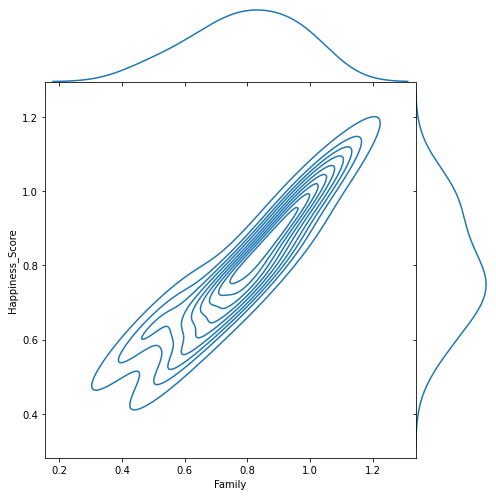

In [12]:
dataframe=pd.pivot_table(d_2015, index = 'Region', values=["Happiness_Score","Family"])

dataframe["Happiness_Score"]=dataframe["Happiness_Score"]/max(dataframe["Happiness_Score"])
dataframe["Family"]=dataframe["Family"]/max(dataframe["Family"])
sns.jointplot(dataframe.Family,dataframe.Happiness_Score,kind="kde",height=7,space=0)
plt.savefig('graph.png')
plt.show()

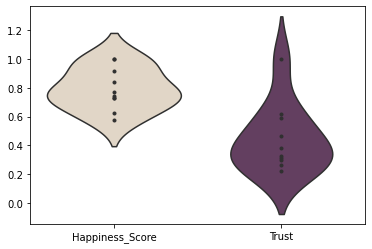

In [13]:
dataframe2=pd.pivot_table(d_2015, index = 'Region', values=["Happiness_Score","Trust"])

dataframe2["Happiness_Score"]=dataframe2["Happiness_Score"]/max(dataframe2["Happiness_Score"])
dataframe2['Trust']=dataframe2["Trust"]/max(dataframe2["Trust"])
pl=sns.cubehelix_palette(2,rot=.5,dark=.3)
sns.violinplot(data=dataframe2, palette=pl, inner="points")
plt.show()

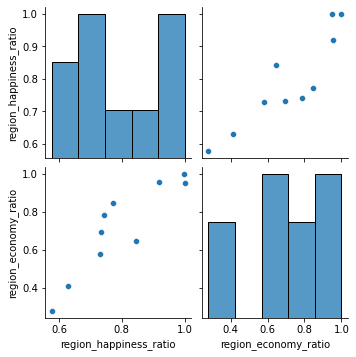

In [14]:
sns.pairplot(data)
plt.show()

C:\Users\TARIQUE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


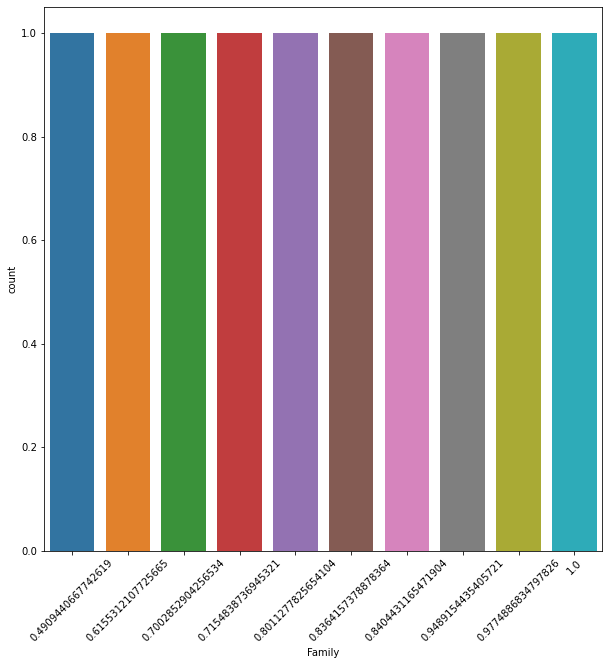

In [15]:
f,ax=plt.subplots(figsize=(10,10))
sns.countplot(dataframe['Family'],ax=ax)
plt.xticks(rotation= 45)
plt.show()